In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas

%matplotlib inline

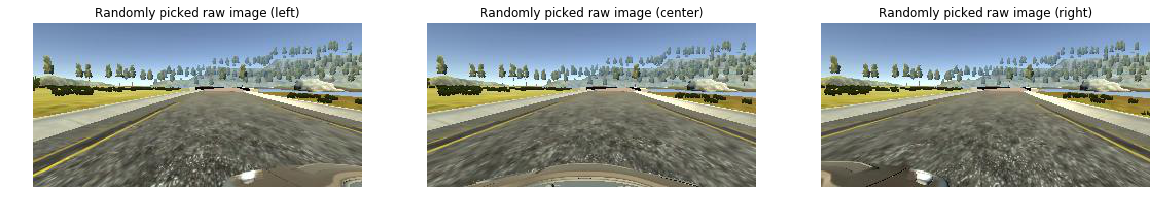

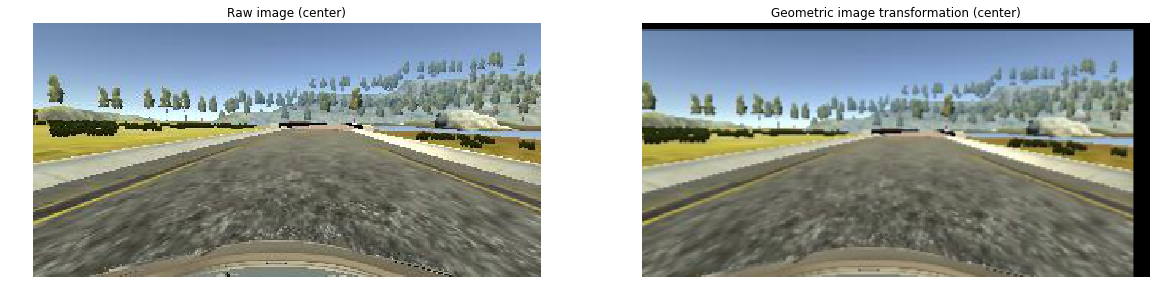

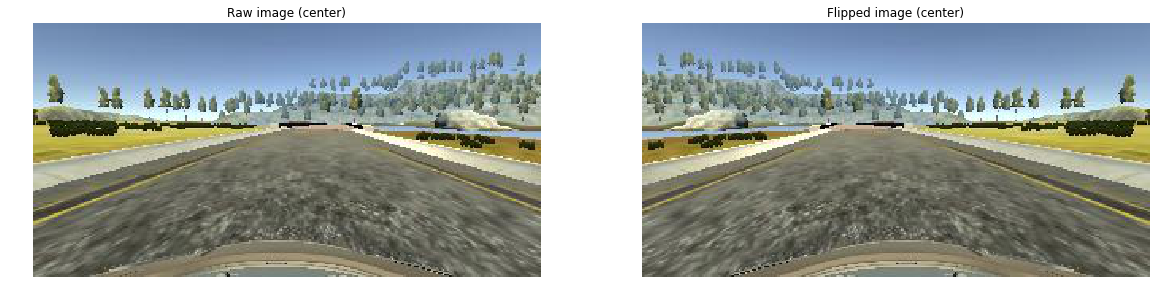

In [5]:
# Load training CSV file
raw_data = pandas.read_csv('udacity_data/driving_log.csv')
# Randomly pick up any camera images
indice = np.random.randint(0, len(raw_data), size=1)
indice = 50
left_raw = raw_data.iloc[indice]['left'].strip()
left_ang = raw_data.iloc[indice]['steering'] + 0.2
right_raw = raw_data.iloc[indice]['right'].strip()
right_ang = raw_data.iloc[indice]['steering'] - 0.2
center_raw = raw_data.iloc[indice]['center'].strip()
center_ang = raw_data.iloc[indice]['steering']
# Load raw images
left_raw = plt.imread('udacity_data/' + left_raw)
right_raw = plt.imread('udacity_data/' + right_raw)
center_raw = plt.imread('udacity_data/' + center_raw)
# Plot raw canera images
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(left_raw)
plt.axis('off')
plt.title('Randomly picked raw image (left)')
plt.subplot(1,3,2)
plt.imshow(center_raw)
plt.axis('off')
plt.title('Randomly picked raw image (center)')
plt.subplot(1,3,3)
plt.imshow(right_raw)
plt.axis('off')
plt.title('Randomly picked raw image (right)')
plt.savefig('images/' + 'raw_image.png')
plt.show()

# Image shearing
x = 100 * (np.random.rand() - 0.5)
y = 10 * (np.random.rand() - 0.5)

center_ang += x * 0.002
m = np.float32([[1,0,x], [0,1,y]])
rows, cols = center_raw.shape[:2]
image_sheared = cv2.warpAffine(center_raw, m, (cols, rows))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(center_raw)
plt.axis('off')
plt.title('Raw image (center)')
plt.subplot(1,2,2)
plt.imshow(image_sheared)
plt.axis('off')
plt.title('Geometric image transformation (center)')
plt.savefig('images/' + 'transformed.png')
plt.show()

# Flip image
image_flipped = np.fliplr(center_raw)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(center_raw)
plt.axis('off')
plt.title('Raw image (center)')
plt.subplot(1,2,2)
plt.imshow(image_flipped)
plt.axis('off')
plt.title('Flipped image (center)')
plt.savefig('images/' + 'flipped.png')
plt.show()